In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/dago/anaconda3/bin/python (found version "3.7.6") 
-- Found PythonLibs: /home/dago/anaconda3/lib/libpython3.7m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/dago/Desktop/Facultad/MN/MNTp3/tp3
-- Configuring done
-- Generating do

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum


/home/dago/Desktop/Facultad/MN/MNTp3/tp3/notebooks
Python 3.7.6


In [4]:
df = pd.read_csv('../data/train.csv')

In [5]:
df = df[df['ciudad']=='Mérida'].dropna()

In [6]:
x = df['metroscubiertos'].values

In [7]:
y = df['precio'].values

In [8]:
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)

In [9]:
x.shape

(518, 1)

In [10]:
from sklearn.linear_model import LinearRegression

"""
Reemplazar por nuestra implementación 
"""

linear_regressor = LinearRegression()
linear_regressor2 = metnum.LinearRegression()

linear_regressor.fit(x,y)
linear_regressor2.fit(x,y)

In [11]:
df['prediction'] = linear_regressor.predict(x)
df['prediction2'] = linear_regressor2.predict(x)

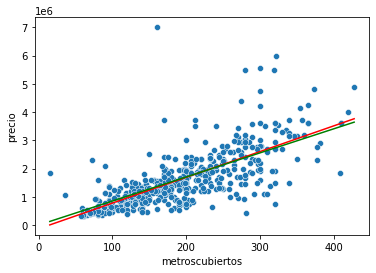

In [12]:
sns.scatterplot(data=df, x='metroscubiertos', y='precio')
sns.lineplot(data=df, x='metroscubiertos', y='prediction', color='red')
sns.lineplot(data=df, x='metroscubiertos', y='prediction2', color='green')


# KFold


In [104]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

def K_Fold(X, y, K=10):
    
    kfold = KFold(n_splits=K)
    #kfold.get_n_splits(X)
    rmse = []
    rmsle = []
    
    for train_index, test_index in kfold.split(X):
        # Separamos el conjunto de entrenamiento y el conjunto de test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        linear_regressor = metnum.LinearRegression()
        linear_regressor.fit(X_train, y_train) 
        y_pred = linear_regressor.predict(X_test)
        
        if (y_pred < 0).any():
            print(len(y_pred))
        
        rmse.append(mean_squared_error(y_test, y_pred, squared=False))
        rmsle.append(mean_squared_log_error(y_test, y_pred))
        
    return np.mean(rmse), np.mean(rmsle)

In [26]:
df = pd.read_csv('../data/train.csv')
df = df[df['ciudad']=='Mérida'].dropna()
x = df['metroscubiertos'].values
y = df['precio'].values
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)
rmse, rmsle = K_Fold(x, y, 10) # 10% de las muestras para testear
print(rmse, rmsle)

644839.3753734664 0.16553826516219017


# Experimentación


- Revisar las columnas y el precio, ver si encontramos alguna relacion con un primer approach naive.
- Definir la expirementacion :D


- Definir un nuevo feature que sea zona urbana/zona rural por que pueden tener comportamientos distintos


In [27]:
df = pd.read_csv('../data/train.csv')
df.nunique()

id                            240000
titulo                        186191
descripcion                   232187
tipodepropiedad                   24
direccion                     140269
ciudad                           875
provincia                         32
antiguedad                        78
habitaciones                      10
garages                            4
banos                              4
metroscubiertos                  425
metrostotales                    425
idzona                         19719
lat                           112147
lng                           112326
fecha                           1830
gimnasio                           2
usosmultiples                      2
piscina                            2
escuelascercanas                   2
centroscomercialescercanos         2
precio                         15520
dtype: int64

In [32]:
df['banos'].value_counts()

2.0    87683
1.0    58173
3.0    49365
4.0    18558
Name: banos, dtype: int64

# Como primera exprimentacion vamos a probar con todas las features, y sin segmentar para ver si obtenemos resultados. Y dropear los que tengas columnas incompletas

Nos da negativo si ponemos muchas features. WHY?


True


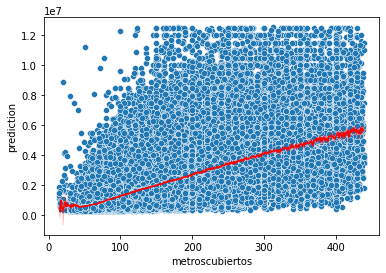

In [33]:
df = pd.read_csv('../data/train.csv')
df2 = df.reindex(columns=["metroscubiertos", "metrostotales", "habitaciones", "banos","antiguedad", "precio"]).dropna()
#df2 = df2[(df2['lat'] > 13) & (df2['lat'] < 34) & (df2['lng'] >= -117) & (df2['lng'] <= -87)]
#df2['lng'] = df2['lng'].abs()

y = df2['precio'].values
df2 = df2.drop(columns=['precio'])
X = df2.to_numpy()

#from sklearn.linear_model import LinearRegression


#linear_regressor = LinearRegression()
linear_regressor = metnum.LinearRegression()
linear_regressor.fit(X,y)

df2['prediction'] = linear_regressor.predict(X)

print((df2['prediction'] < 0).any())

sns.scatterplot(x=df2['metroscubiertos'], y=y)
sns.lineplot(data=df2, x='metroscubiertos', y='prediction', color='red')

#sns.scatterplot(x=df2['antiguedad'], y=y)
#sns.lineplot(data=df2, x='antiguedad', y='prediction', color='red')

# exp para determinar si estan mal clasificados las lng y lat

In [83]:
print(len(df2))
print(len(df2[(df2['lat'] > 13) & (df2['lat'] < 34)]))

print(len(df2))
print(len(df2[(df2['lng'] >= -117) & (df2['lng'] <= -87)]))

58776
58604
58776
57273


In [100]:
print(len(df2[df2['lat'] < 0]))

0


False

In [15]:
df = pd.read_csv('../data/train.csv')
df2 = df.reindex(columns=["antiguedad", "habitaciones", "garages", "banos", "metroscubiertos", "metrostotales", "lat",
                          "lng", "gimnasio", "usosmultiples", "piscina", "escuelascercanas", "centroscomercialescercanos", "precio"]).dropna()
df2 = df2[(df2['lat'] > 13) & (df2['lat'] < 34) & (df2['lng'] >= -117) & (df2['lng'] <= -87)]
df2['lng'] = df2['lng'].abs()

y = df2['precio'].values
df2 = df2.drop(columns=['precio'])
X = df2.to_numpy()

print(K_Fold(X, y, 10))

NameError: name 'K_Fold' is not defined

# Observaciones:
- Podemos elimnar las latitudes que esten fuera de las latitudes de mexico y lo mismo para lng
- Hacemos modulo de la latitud y longitud para poder usar rmsle (eliminamos aprox 1k de lng mal tageados)
El data set est

# Preguntas:
Como ir viendo los graficos si se experimenta con KFold y esto genera K distintos


# tamos trabados so segmentation time


- Division por tipo de propiedad entre comercial y residencial(y rural?) teniendo en cuenta tipo de mercado
- Por lapsos de años teniendo en cuenta el crecimiento/ fluctuacion del mercado inmobiliario / inflacion


In [16]:
df['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

In [19]:
df[df['tipodepropiedad']=='Edificio']

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
242,67919,edificio en venta mazatlan sinaloa centro esqu...,400 m2 terreno; 1100 m2 construídos; 3 niveles...,Edificio,GABRIEL LEYVA ESQUINA ZARAGOZA,Mazatlán,Sinaloa,20.0,10.0,NaN,...,93318.0,23.207363,-106.411095,2015-11-09 00:00:00,0.0,0.0,0.0,1.0,1.0,2800000.0
510,55713,oportunidad vendo edificio con 9 departamentos,"<p>oportunidad edificio con 9 departamentos, 3...",Edificio,"Cerro, Campestre Churubusco, Coyoacan}",Coyoacán,Distrito Federal,40.0,NaN,0.0,...,23592.0,19.342983,-99.142520,2013-10-12 00:00:00,0.0,0.0,0.0,0.0,0.0,3700000.0
1180,125307,edificio para remodelar super ubicacion de 3 n...,"edificio super ubicacion para remodelar, buena...",Edificio,Carolina,Gustavo A. Madero,Distrito Federal,50.0,10.0,0.0,...,24052.0,NaN,NaN,2015-08-03 00:00:00,0.0,0.0,0.0,0.0,0.0,4500000.0
1228,42303,gran oportunidad de negocio edificio departame...,gran oportunidad de negocio edificio departame...,Edificio,Pasando el arco vial de la juarez,Playa del Carmen,Quintana Roo,4.0,10.0,NaN,...,130510.0,20.636370,-87.099380,2014-05-21 00:00:00,0.0,0.0,0.0,1.0,1.0,3300000.0
1684,176462,"edificio en venta en lázaro cárdenas, toluca",<p>excelente inversi&oacute;n ideal para clini...,Edificio,ANTONIO ALBARRAN 210 B,Toluca,Edo. de México,20.0,NaN,NaN,...,52025.0,19.267932,-99.650590,2013-10-15 00:00:00,0.0,0.0,0.0,0.0,0.0,3500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238526,206376,edificio en venta en los manantiales,venta de edificio de 3 niveles en los manantia...,Edificio,Nicolas Romero Manantiales,Nicolás Romero,Edo. de México,12.0,NaN,3.0,...,56621.0,NaN,NaN,2012-10-16 00:00:00,0.0,0.0,0.0,0.0,0.0,2500000.0
238890,21172,"col. rio san javier, tlalnepantla, excelente ...",<p>tiene cocineta. 2 privados en segundo piso....,Edificio,NaN,Tlalnepantla de Baz,Edo. de México,21.0,NaN,NaN,...,56301.0,19.538016,-99.210838,2016-12-19 00:00:00,0.0,0.0,0.0,0.0,0.0,3800000.0
238933,67642,edificio en venta en venustiano carranza,nocnok id: mx15-bi5366. inmueble con 4 locales...,Edificio,NaN,Venustiano Carranza,Distrito Federal,NaN,4.0,NaN,...,25000.0,19.444105,-99.097758,2015-10-09 00:00:00,0.0,0.0,0.0,0.0,0.0,3200000.0
238982,128177,edificio en venta alvaro obregon puente colora...,"edificio en esquina de 3 niveles, 5 departamen...",Edificio,"Puente Colorado, Álvaro Obregón, Distrito Federal",Alvaro Obregón,Distrito Federal,20.0,NaN,0.0,...,23352.0,19.347299,-99.231379,2016-10-26 00:00:00,0.0,0.0,0.0,1.0,1.0,5000000.0


In [27]:
pd.to_datetime(df['fecha'])

df.groupby([pd.to_datetime(df['fecha']).dt.year]).count()


,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
fecha,,,,,,,,,,,,,,,,,,,,,
2012,23534,20867,22817,23534,21038,23534,23534,23474,21424,21468,...,19312,9435,9435,23534,23534,23534,23534,23534,23534,23534
2013,30386,29793,30029,30386,22529,30377,30386,29939,27709,27919,...,26489,19847,19847,30386,30386,30386,30386,30386,30386,30386
2014,40572,39506,40250,40533,29814,40344,40442,30865,36358,35233,...,34941,16765,16765,40572,40572,40572,40572,40572,40572,40572
2015,51470,50839,51340,51464,36278,51436,51469,36901,46771,43656,...,44925,21246,21246,51470,51470,51470,51470,51470,51470,51470
2016,94038,93608,93945,94037,77269,93937,94014,75266,85267,73959,...,85712,49219,49219,94038,94038,94038,94038,94038,94038,94038


Vamos a realizar el mismo experimento que antes pero antes segmentando por casas para ver si cambia

False


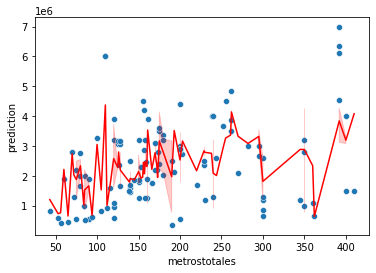

In [41]:
df = pd.read_csv('../data/train.csv')
df = df[df['tipodepropiedad'] == 'Villa']
df2 = df.reindex(columns=["metroscubiertos", "metrostotales", "habitaciones", "banos","antiguedad", "precio"]).dropna()
#df2 = df2[(df2['lat'] > 13) & (df2['lat'] < 34) & (df2['lng'] >= -117) & (df2['lng'] <= -87)]
#df2['lng'] = df2['lng'].abs()

y = df2['precio'].values
df2 = df2.drop(columns=['precio'])
X = df2.to_numpy()

#from sklearn.linear_model import LinearRegression


#linear_regressor = LinearRegression()
linear_regressor = metnum.LinearRegression()
linear_regressor.fit(X,y)

df2['prediction'] = linear_regressor.predict(X)

print((df2['prediction'] < 0).any())

sns.scatterplot(x=df2['metrostotales'], y=y)
sns.lineplot(data=df2, x='metrostotales', y='prediction', color='red')

#sns.scatterplot(x=df2['antiguedad'], y=y)
#sns.lineplot(data=df2, x='antiguedad', y='prediction', color='red')